# Load Data

In [1]:
import json
import pandas as pd
import numpy as np

from collections import OrderedDict
from collections import Counter
import operator

import matplotlib.pyplot as plt
import matplotlib

import folium
from folium.plugins import MarkerCluster


### Read the data files

In [2]:
CA_raw_df = pd.read_json('CA_data_scientist_or_machine_learning__201904071234.json', orient='index')
CA_geo_df = pd.read_csv('ca_city.csv')
CA_geo_prov_df = pd.read_csv('ca_province.csv')


In [3]:
CA_raw_df.head()

company          loc  \
0           Yappn Canada Inc  Toronto, ON   
1     Intelius Analytics Ltd  Calgary, AB   
10                   Longo's  Vaughan, ON   
100                      Ada  Toronto, ON   
1000                 Precima  Toronto, ON   

                                                posting  \
0     Toronto, ON $50,000 - $65,000 a year We are lo...   
1     Calgary, AB Contract Position Type:  Full Time...   
10    Vaughan, ON Longo’s is committed to maintainin...   
100   Toronto, ON At Ada, we're helping companies us...   
1000  Toronto, ON Description: \nAbout the Opportuni...   

                                                salary sponsored_flg  \
0     \n \n                $50,000 - $65,000 a year \n     Sponsored   
1                                                          Sponsored   
10                                                                     
100                                                                    
1000                                                       Sponsored   

                                                summary  \
0     \n            We expect our  Machine   Learnin...   
1     \n            Junior  Data   Scientist . Intel...   
10    \n            The  Data   Scientist  will acce...   
100   \n            As our VP of  Machine   Learning...   
1000  \n            Alliance  Data  participates in ...   

                          title  \
0     Machine Learning Engineer   
1         Junior Data Scientist   
10               Data Scientist   
100      VP of Machine Learning   
1000             Data Scientist   

                                                    url  
0     https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...  
1     https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...  
10    https://ca.indeed.com/rc/clk?jk=10630fb75ab081...  
100   https://ca.indeed.com/rc/clk?jk=55a35c4afdf652...  
1000  https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...

### Desribe the data
This shows the record count, fields, top value and frequency of top value

In [4]:
CA_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 999
Data columns (total 8 columns):
company          2209 non-null object
loc              2209 non-null object
posting          2209 non-null object
salary           2209 non-null object
sponsored_flg    2209 non-null object
summary          2209 non-null object
title            2209 non-null object
url              2209 non-null object
dtypes: object(8)
memory usage: 155.3+ KB


In [5]:
CA_raw_df.describe()

company          loc  \
count         2209         2209   
unique         462           59   
top     SPORTLOGiQ  Toronto, ON   
freq            88          887   

                                                  posting salary  \
count                                                2209   2209   
unique                                                946     52   
top     Toronto, ON You will lead product management f...          
freq                                                   45   1974   

       sponsored_flg                                            summary  \
count           2209                                               2209   
unique             2                                                840   
top                   \n            Ability to develop  machine   le...   
freq            1740                                                 70   

                 title                                                url  
count             2209                                               2209  
unique             666                                               1288  
top     Data Scientist  https://ca.indeed.com/rc/clk?jk=c884c2bd7ae291...  
freq               153                                                 75

In [6]:
CA_geo_df.head()



city        lat         lng country iso2             admin  capital  \
0    Toronto  43.666667  -79.416667  Canada   CA           Ontario    admin   
1   Montreal  45.500000  -73.583333  Canada   CA            Quebec      NaN   
2  Vancouver  49.250000 -123.133333  Canada   CA  British Columbia      NaN   
3     Ottawa  45.416667  -75.700000  Canada   CA           Ontario  primary   
4    Calgary  51.083333 -114.083333  Canada   CA           Alberta      NaN   

   population  population_proper  
0     5213000            3934421  
1     3678000            2356556  
2     2313328             603502  
3     1145000             812129  
4     1110000             915322

In [7]:
CA_geo_df.rename(columns={'admin':'province_fullname'}, inplace=True)
CA_geo_df.head()

city        lat         lng country iso2 province_fullname  capital  \
0    Toronto  43.666667  -79.416667  Canada   CA           Ontario    admin   
1   Montreal  45.500000  -73.583333  Canada   CA            Quebec      NaN   
2  Vancouver  49.250000 -123.133333  Canada   CA  British Columbia      NaN   
3     Ottawa  45.416667  -75.700000  Canada   CA           Ontario  primary   
4    Calgary  51.083333 -114.083333  Canada   CA           Alberta      NaN   

   population  population_proper  
0     5213000            3934421  
1     3678000            2356556  
2     2313328             603502  
3     1145000             812129  
4     1110000             915322

In [8]:
CA_geo_prov_df.head()

province      lat       lng
0  British Columbia  53.7267 -127.6475
1            Quebec  52.9399  -73.5491
2           Ontario  51.2538  -85.3232
3       Nova Scotia  44.6820  -63.7443
4           Alberta  53.9333 -116.5765

# Data Preprocessing

### Standardize Job Titles (convert all to uppercase)

In [9]:
CA_processed_df = CA_raw_df
CA_processed_df['title_processed'] = CA_raw_df['title'].str.replace('\n', '').str.upper()
CA_processed_df['posting_processed'] = CA_raw_df['posting'].str.replace('\n', '').str.upper()
CA_processed_df['summary_processed'] = CA_raw_df['summary'].str.replace('\n', '').str.upper()
CA_processed_df['company_processed'] = CA_raw_df['company'].str.replace('\n', '').str.upper()
CA_processed_df['salary_processed'] = CA_raw_df['salary'].str.replace('\n', '').str.upper()
CA_processed_df['salary_flg'] = (CA_raw_df['salary'] != '')

CA_processed_df.head(3)

company          loc  \
0         Yappn Canada Inc  Toronto, ON   
1   Intelius Analytics Ltd  Calgary, AB   
10                 Longo's  Vaughan, ON   

                                              posting  \
0   Toronto, ON $50,000 - $65,000 a year We are lo...   
1   Calgary, AB Contract Position Type:  Full Time...   
10  Vaughan, ON Longo’s is committed to maintainin...   

                                              salary sponsored_flg  \
0   \n \n                $50,000 - $65,000 a year \n     Sponsored   
1                                                        Sponsored   
10                                                                   

                                              summary  \
0   \n            We expect our  Machine   Learnin...   
1   \n            Junior  Data   Scientist . Intel...   
10  \n            The  Data   Scientist  will acce...   

                        title  \
0   Machine Learning Engineer   
1       Junior Data Scientist   
10             Data Scientist   

                                                  url  \
0   https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
1   https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
10  https://ca.indeed.com/rc/clk?jk=10630fb75ab081...   

              title_processed  \
0   MACHINE LEARNING ENGINEER   
1       JUNIOR DATA SCIENTIST   
10             DATA SCIENTIST   

                                    posting_processed  \
0   TORONTO, ON $50,000 - $65,000 A YEAR WE ARE LO...   
1   CALGARY, AB CONTRACT POSITION TYPE:  FULL TIME...   
10  VAUGHAN, ON LONGO’S IS COMMITTED TO MAINTAININ...   

                                    summary_processed       company_processed  \
0               WE EXPECT OUR  MACHINE   LEARNING ...        YAPPN CANADA INC   
1               JUNIOR  DATA   SCIENTIST . INTELIU...  INTELIUS ANALYTICS LTD   
10              THE  DATA   SCIENTIST  WILL ACCESS...                 LONGO'S   

                              salary_processed  salary_flg  
0                    $50,000 - $65,000 A YEAR         True  
1                                                    False  
10                                                   False

### Check for missing data (i.e. NA)

In [10]:
CA_raw_df[pd.isna(CA_raw_df['loc'])].head()

Empty DataFrame
Columns: [company, loc, posting, salary, sponsored_flg, summary, title, url, title_processed, posting_processed, summary_processed, company_processed, salary_processed, salary_flg]
Index: []

### Remove duplicates by URL

In [11]:
CA_processed_df = CA_processed_df.drop_duplicates(subset =["url"], keep = 'first') 
CA_processed_df.describe()

company          loc  \
count         1288         1288   
unique         462           59   
top     SPORTLOGiQ  Toronto, ON   
freq            87          529   

                                                  posting salary  \
count                                                1288   1288   
unique                                                827     52   
top     Calgary, AB Contract Position Type:  Full Time...          
freq                                                   44   1061   

       sponsored_flg                                            summary  \
count           1288                                               1288   
unique             2                                                768   
top                   \n            We expect our  Machine   Learnin...   
freq             819                                                 70   

                 title                                                url  \
count             1288                                               1288   
unique             666                                               1288   
top     Data Scientist  https://ca.indeed.com/rc/clk?jk=085677aeeb06a0...   
freq               147                                                  1   

       title_processed                                  posting_processed  \
count             1288                                               1288   
unique             662                                                827   
top     DATA SCIENTIST  CALGARY, AB CONTRACT POSITION TYPE:  FULL TIME...   
freq               153                                                 44   

                                        summary_processed company_processed  \
count                                                1288              1288   
unique                                                768               462   
top                 WE EXPECT OUR  MACHINE   LEARNING ...        SPORTLOGIQ   
freq                                                   70                87   

       salary_processed salary_flg  
count              1288       1288  
unique               52          2  
top                          False  
freq               1061       1061

### Effect of Sponsored Jobs (i.e job posting where companies pay to promote position)

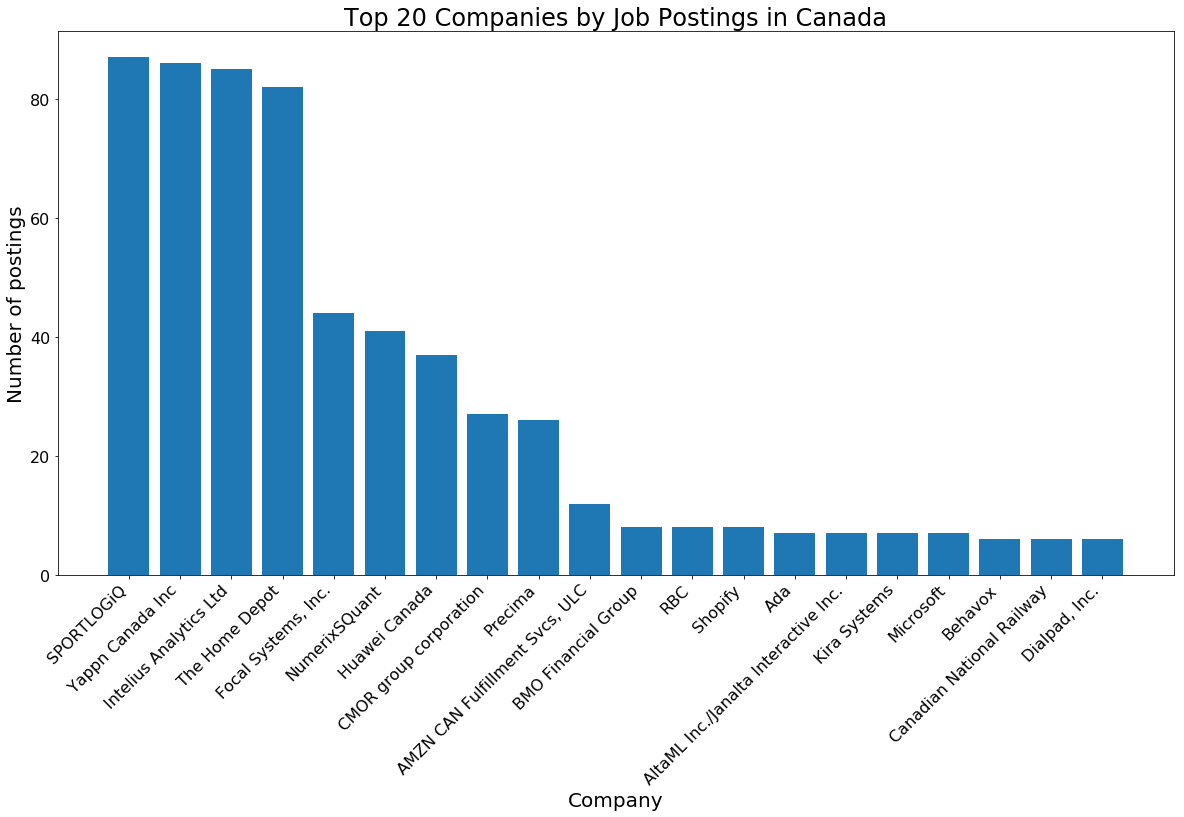

In [12]:
#Number of jobs in Canada by Company
freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["company"] ).size()}).reset_index()

top_20_freq_df = freq_df.nlargest(20, 'count')
plt.figure(figsize=(20,10))
plt.bar(top_20_freq_df['company'], top_20_freq_df['count'])
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Top 20 Companies by Job Postings in Canada', fontsize=24)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Number of postings', fontsize=20)
locs, labels = plt.xticks()
plt.show()

#get companies in the order of the graph
companies =  [i._text for i in labels]

### Stack chart of sponsored and unsponsored jobs for the same company

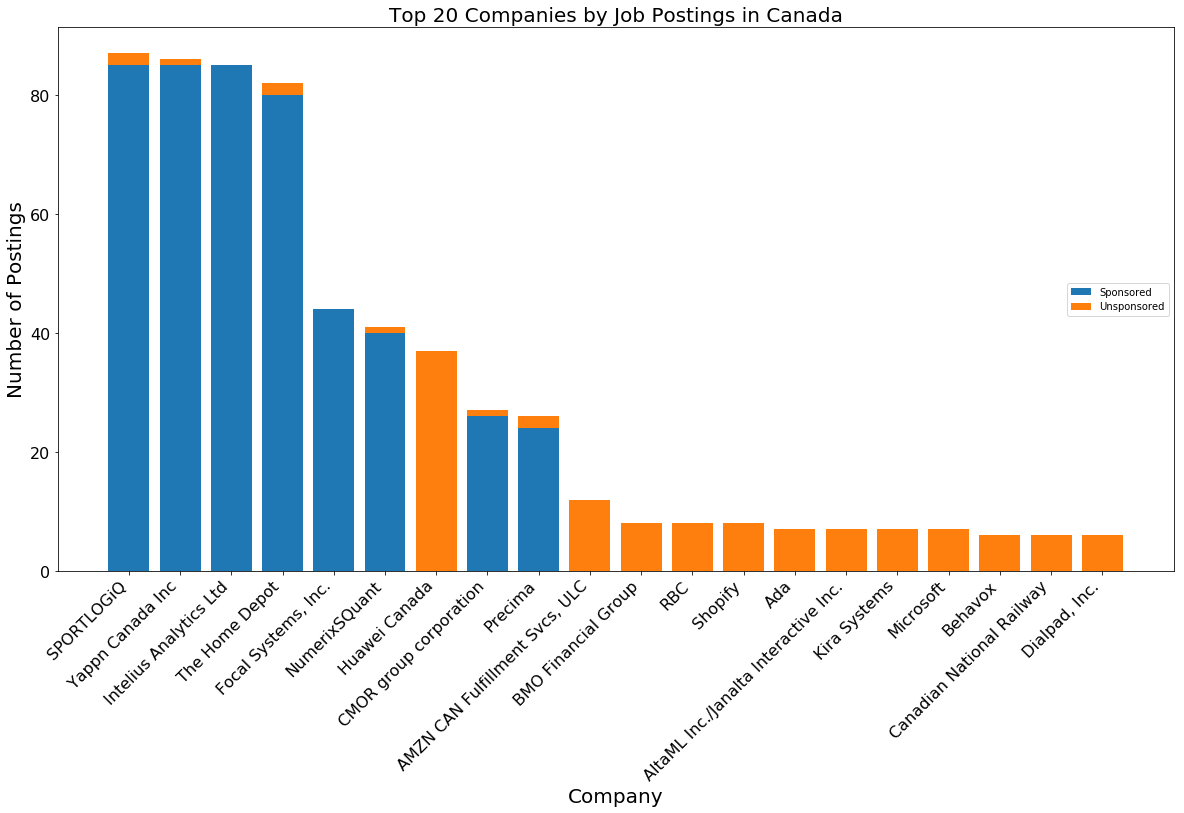

In [13]:
#list(set(top_20_freq_df['company']))
freq_df = pd.DataFrame({'count': CA_processed_df.groupby(['company', 'sponsored_flg']).size()}).reset_index()
freq_df.head()

sponsored = []
unsponsored = []
company_list = companies
for company in (company_list):   
    num_sponsored = (len(freq_df[(freq_df['company'] == company) & (freq_df['sponsored_flg'] != '')]['count']))

    if (num_sponsored > 0):
        sponsored.append(freq_df[(freq_df.company == company) & (freq_df.sponsored_flg != '')]['count'].iloc[0])
    else:
        sponsored.append(0)
        
    num_unsponsored = (len(freq_df[(freq_df['company'] == company) & (freq_df['sponsored_flg']== '')]['count']))
    if (num_unsponsored > 0):
        unsponsored.append(freq_df[(freq_df.company == company) & (freq_df.sponsored_flg == '')]['count'].iloc[0]) 
    else:
        unsponsored.append(0)
      
    

fig = plt.figure(figsize=(20,10))
plt.bar(company_list, sponsored, label='Sponsored')
plt.bar(company_list, unsponsored, bottom=sponsored, label='Unsponsored')
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Top 20 Companies by Job Postings in Canada', fontsize=20)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Number of Postings', fontsize=20)
plt.legend(loc="right")
plt.show()

### Remove sponsored jobs (i.e job postings where companies pay to promote posting)

In [14]:
CA_processed_df = CA_processed_df[CA_processed_df['sponsored_flg'] == '']
CA_processed_df.describe()

company          loc  \
count             819          819   
unique            460           59   
top     Huawei Canada  Toronto, ON   
freq               37          314   

                                                  posting salary  \
count                                                 819    819   
unique                                                817     52   
top     Permanent Position Overview\n The RSA Actuaria...          
freq                                                    2    761   

       sponsored_flg                                            summary  \
count            819                                                819   
unique             1                                                737   
top                   \n Machine   learning  is driving a new indust...   
freq             819                                                  5   

                 title                                                url  \
count              819                                                819   
unique             665                                                819   
top     Data Scientist  https://ca.indeed.com/rc/clk?jk=8c40680359e160...   
freq                43                                                  1   

       title_processed                                  posting_processed  \
count              819                                                819   
unique             661                                                817   
top     DATA SCIENTIST  PERMANENT POSITION OVERVIEW THE RSA ACTUARIAL ...   
freq                49                                                  2   

                                        summary_processed company_processed  \
count                                                 819               819   
unique                                                737               460   
top                 WE HAVE YEARS OF  DATA  COLLECTED ...     HUAWEI CANADA   
freq                                                    5                37   

       salary_processed salary_flg  
count               819        819  
unique               52          2  
top                          False  
freq                761        761

### Parse location into city and province code

In [15]:
#split location into city/district and province using regular expression
loc_df = CA_processed_df['loc'].str.extract('(?P<loc1>[\w|\W]+),\s(?P<loc2>[A-Z]{2})', expand=True)
CA_processed_df = pd.concat([CA_processed_df, loc_df], axis=1)
CA_processed_df.head()

company           loc  \
10         Longo's   Vaughan, ON   
100            Ada   Toronto, ON   
1005        Huawei   Toronto, ON   
1006      Oath Inc  Montréal, QC   
1007  TandemLaunch  Montréal, QC   

                                                posting salary sponsored_flg  \
10    Vaughan, ON Longo’s is committed to maintainin...                        
100   Toronto, ON At Ada, we're helping companies us...                        
1005  Toronto, ON Canada/Toronto - Technology North ...                        
1006  Montréal, QC As Verizon’s media unit, our bran...                        
1007  Corowave is a Montreal-based start-up in the p...                        

                                                summary  \
10    \n            The  Data   Scientist  will acce...   
100   \n            As our VP of  Machine   Learning...   
1005  \n            Has numerous publications relate...   
1006  \n Data  is your middle name; Deep understandi...   
1007  \n            Collaborate with AI team and sig...   

                                title  \
10                     Data Scientist   
100            VP of Machine Learning   
1005  Lead Computer Vision Researcher   
1006                 Account Director   
1007    Biosignal Processing Engineer   

                                                    url  \
10    https://ca.indeed.com/rc/clk?jk=10630fb75ab081...   
100   https://ca.indeed.com/rc/clk?jk=55a35c4afdf652...   
1005  https://ca.indeed.com/rc/clk?jk=e6ccc319e07155...   
1006  https://ca.indeed.com/rc/clk?jk=5b80ca65eb7500...   
1007  https://ca.indeed.com/rc/clk?jk=84f70c2ee3a2f6...   

                      title_processed  \
10                     DATA SCIENTIST   
100            VP OF MACHINE LEARNING   
1005  LEAD COMPUTER VISION RESEARCHER   
1006                 ACCOUNT DIRECTOR   
1007    BIOSIGNAL PROCESSING ENGINEER   

                                      posting_processed  \
10    VAUGHAN, ON LONGO’S IS COMMITTED TO MAINTAININ...   
100   TORONTO, ON AT ADA, WE'RE HELPING COMPANIES US...   
1005  TORONTO, ON CANADA/TORONTO - TECHNOLOGY NORTH ...   
1006  MONTRÉAL, QC AS VERIZON’S MEDIA UNIT, OUR BRAN...   
1007  COROWAVE IS A MONTREAL-BASED START-UP IN THE P...   

                                      summary_processed company_processed  \
10                THE  DATA   SCIENTIST  WILL ACCESS...           LONGO'S   
100               AS OUR VP OF  MACHINE   LEARNING ,...               ADA   
1005              HAS NUMEROUS PUBLICATIONS RELATED ...            HUAWEI   
1006   DATA  IS YOUR MIDDLE NAME; DEEP UNDERSTANDING...          OATH INC   
1007              COLLABORATE WITH AI TEAM AND SIGNA...      TANDEMLAUNCH   

     salary_processed  salary_flg      loc1 loc2  
10                          False   Vaughan   ON  
100                         False   Toronto   ON  
1005                        False   Toronto   ON  
1006                        False  Montréal   QC  
1007                        False  Montréal   QC

### Standardize city names and provinces for geovisualization

In [16]:
#Stardardize city names and provinces
CA_processed_df['city'] = CA_processed_df['loc1']
CA_processed_df.loc[CA_processed_df['city'] == 'Montréal', 'city'] = 'Montreal'

CA_processed_df['province'] = CA_processed_df['loc2']
CA_processed_df['province_fullname'] = CA_processed_df['province']

CA_processed_df.loc[CA_processed_df['province_fullname'] == 'ON', 'province_fullname'] = 'Ontario'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'BC', 'province_fullname'] = 'British Columbia'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'SK', 'province_fullname'] = 'Saskatchewan'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'MB', 'province_fullname'] = 'Manitoba'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'AB', 'province_fullname'] = 'Alberta'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'QC', 'province_fullname'] = 'Quebec'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'NS', 'province_fullname'] = 'Nova Scotia'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'NB', 'province_fullname'] = 'New Brunswick'
CA_processed_df.loc[CA_processed_df['province_fullname'] == 'NL', 'province_fullname'] = 'Newfoundland and Labrador'


CA_processed_df.head()



company           loc  \
10         Longo's   Vaughan, ON   
100            Ada   Toronto, ON   
1005        Huawei   Toronto, ON   
1006      Oath Inc  Montréal, QC   
1007  TandemLaunch  Montréal, QC   

                                                posting salary sponsored_flg  \
10    Vaughan, ON Longo’s is committed to maintainin...                        
100   Toronto, ON At Ada, we're helping companies us...                        
1005  Toronto, ON Canada/Toronto - Technology North ...                        
1006  Montréal, QC As Verizon’s media unit, our bran...                        
1007  Corowave is a Montreal-based start-up in the p...                        

                                                summary  \
10    \n            The  Data   Scientist  will acce...   
100   \n            As our VP of  Machine   Learning...   
1005  \n            Has numerous publications relate...   
1006  \n Data  is your middle name; Deep understandi...   
1007  \n            Collaborate with AI team and sig...   

                                title  \
10                     Data Scientist   
100            VP of Machine Learning   
1005  Lead Computer Vision Researcher   
1006                 Account Director   
1007    Biosignal Processing Engineer   

                                                    url  \
10    https://ca.indeed.com/rc/clk?jk=10630fb75ab081...   
100   https://ca.indeed.com/rc/clk?jk=55a35c4afdf652...   
1005  https://ca.indeed.com/rc/clk?jk=e6ccc319e07155...   
1006  https://ca.indeed.com/rc/clk?jk=5b80ca65eb7500...   
1007  https://ca.indeed.com/rc/clk?jk=84f70c2ee3a2f6...   

                      title_processed  \
10                     DATA SCIENTIST   
100            VP OF MACHINE LEARNING   
1005  LEAD COMPUTER VISION RESEARCHER   
1006                 ACCOUNT DIRECTOR   
1007    BIOSIGNAL PROCESSING ENGINEER   

                                      posting_processed  \
10    VAUGHAN, ON LONGO’S IS COMMITTED TO MAINTAININ...   
100   TORONTO, ON AT ADA, WE'RE HELPING COMPANIES US...   
1005  TORONTO, ON CANADA/TORONTO - TECHNOLOGY NORTH ...   
1006  MONTRÉAL, QC AS VERIZON’S MEDIA UNIT, OUR BRAN...   
1007  COROWAVE IS A MONTREAL-BASED START-UP IN THE P...   

                                      summary_processed company_processed  \
10                THE  DATA   SCIENTIST  WILL ACCESS...           LONGO'S   
100               AS OUR VP OF  MACHINE   LEARNING ,...               ADA   
1005              HAS NUMEROUS PUBLICATIONS RELATED ...            HUAWEI   
1006   DATA  IS YOUR MIDDLE NAME; DEEP UNDERSTANDING...          OATH INC   
1007              COLLABORATE WITH AI TEAM AND SIGNA...      TANDEMLAUNCH   

     salary_processed  salary_flg      loc1 loc2      city province  \
10                          False   Vaughan   ON   Vaughan       ON   
100                         False   Toronto   ON   Toronto       ON   
1005                        False   Toronto   ON   Toronto       ON   
1006                        False  Montréal   QC  Montreal       QC   
1007                        False  Montréal   QC  Montreal       QC   

     province_fullname  
10             Ontario  
100            Ontario  
1005           Ontario  
1006            Quebec  
1007            Quebec

## Standardize Salaries

In [17]:
#helper fuction to deterimine the average salary

def getMeanSalary(salary_str):
    mean_salary = np.NaN
    
    if (salary_str.strip() == ''):
        return mean_salary
    
    if 'YEAR' in salary_str:
        salary_str = salary_str.replace('A YEAR', '').replace(',', '').replace('$', '')
        a = salary_str.split('-')
        if len(a) == 2:
            mean_salary = np.mean([float(b) for b in a])
        else:
            mean_salary = float((a[0]))
    elif 'MONTH' in salary_str:
        salary_str = salary_str.replace('A MONTH', '').replace(',', '').replace('$', '')
        a = salary_str.split('-')
        if len(a) == 2:
            mean_salary = np.mean([float(b) for b in a])*12
        else:
            mean_salary = float((a[0]))*12
    elif 'WEEK' in salary_str:
        salary_str = salary_str.replace('A WEEK', '').replace(',', '').replace('$', '')
        a = salary_str.split('-')
        if len(a) == 2:
            mean_salary = np.mean([float(b) for b in a])*52
        else:
            mean_salary = float((a[0]))*52
    elif 'DAY' in salary_str:
        salary_str = salary_str.replace('A DAY', '').replace(',', '').replace('$', '')
        a = salary_str.split('-')
        if len(a) == 2:
            mean_salary = np.mean([float(b) for b in a])*260
        else:
            mean_salary = float((a[0]))*260
    elif 'HOUR' in salary_str:
        salary_str = salary_str.replace('AN HOUR', '').replace(',', '').replace('$', '')
        a = salary_str.split('-')
        if len(a) == 2:
            mean_salary = np.mean([float(b) for b in a])*52*37.5
        else:
            mean_salary = float((a[0]))*52*37.5
    else:
        try:
            salary_str = salary_str.replace(',', '').replace('$', '')
            a = salary_str.split('-')
            if len(a) == 2:
                mean_salary = np.mean([float(b) for b in a])
            else:
                mean_salary = float((a[0]))
        except:
            mean_salary = np.NaN
    
    return mean_salary


In [18]:
CA_processed_df['mean_salary'] = CA_processed_df['salary_processed'].apply(getMeanSalary)

# Data Visualization

### Top 20 Companies with the most job postings

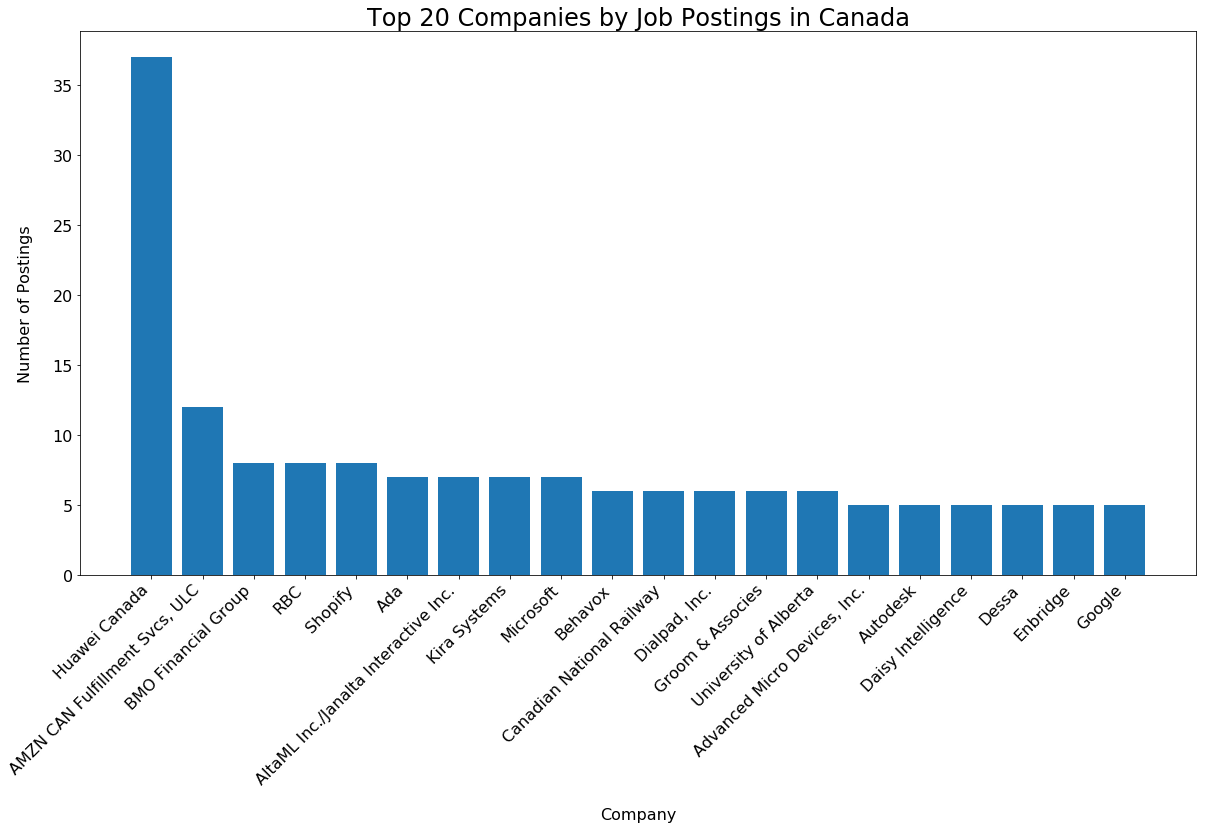

In [19]:
#Number of jobs in Canada by Company
freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["company"] ).size()}).reset_index()

top_20_freq_df = freq_df.nlargest(20, 'count')
plt.figure(figsize=(20,10))
plt.bar(top_20_freq_df['company'], top_20_freq_df['count'])
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Top 20 Companies by Job Postings in Canada', fontsize=24)
plt.xlabel('Company', fontsize=16, labelpad=20)
plt.ylabel('Number of Postings', fontsize=16, labelpad=20)
locs, labels = plt.xticks()
plt.show()

#get companies in the order of the graph
companies =  [i._text for i in labels]

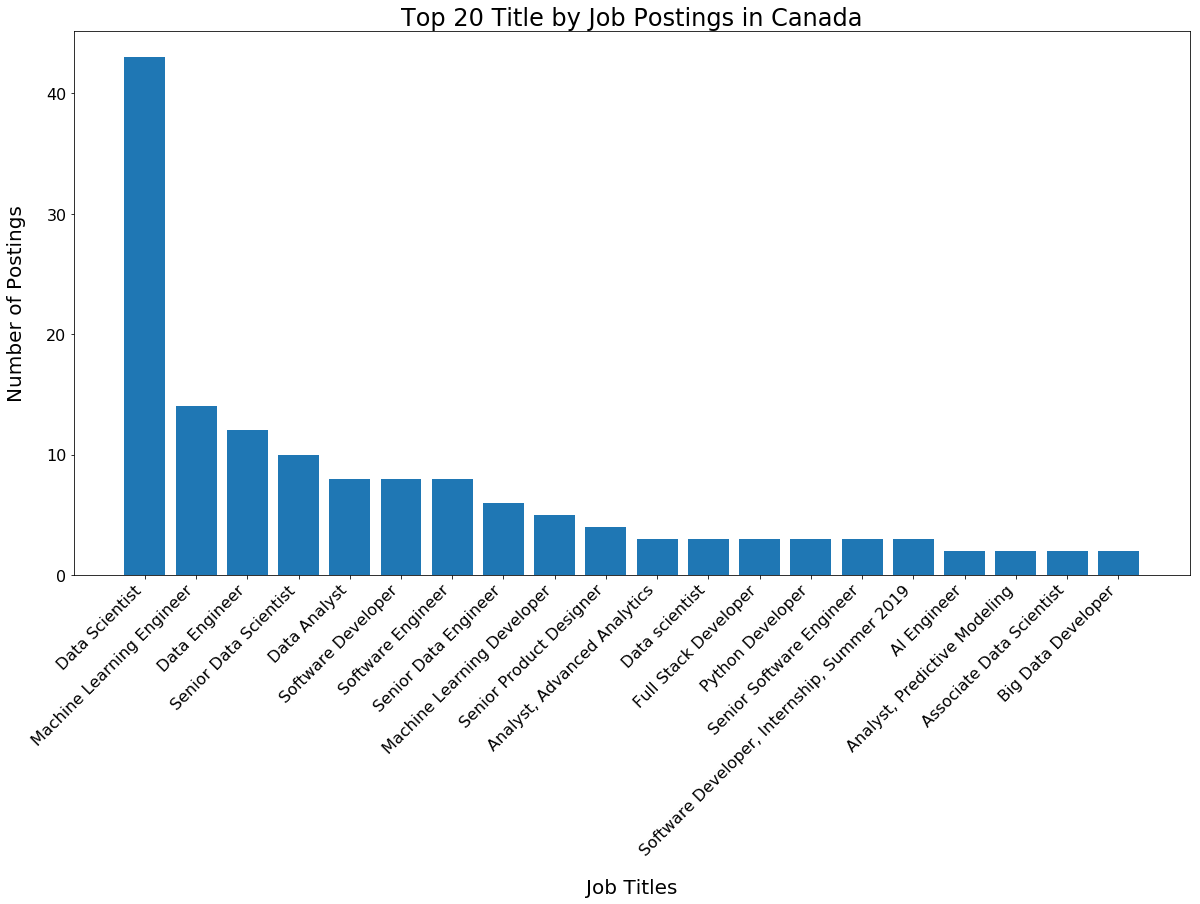

In [20]:
#job titles
#Number of jobs in Canada by Company
freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["title"] ).size()}).reset_index()

top_20_freq_df = freq_df.nlargest(20, 'count')
plt.figure(figsize=(20,10))
plt.bar(top_20_freq_df['title'], top_20_freq_df['count'])
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Top 20 Title by Job Postings in Canada', fontsize=24)
plt.xlabel('Job Titles', fontsize=20, labelpad=20)
plt.ylabel('Number of Postings', fontsize=20, labelpad=20)
locs, labels = plt.xticks()
plt.show()

#get companies in the order of the graph
titles =  [i._text for i in labels]


## Location Preprocessing

In [21]:
#merge geo data
#CA_processed_df['loc1']
CA_merged_df = pd.merge(CA_processed_df, CA_geo_df, on=['city', 'province_fullname'], how='inner')
CA_merged_df.head()

company          loc  \
0             Longo's  Vaughan, ON   
1  Daisy Intelligence  Vaughan, ON   
2  Daisy Intelligence  Vaughan, ON   
3           CannTrust  Vaughan, ON   
4  Daisy Intelligence  Vaughan, ON   

                                             posting salary sponsored_flg  \
0  Vaughan, ON Longo’s is committed to maintainin...                        
1  Lead Machine Learning Scientist \n \nJoin us t...                        
2  Vaughan, ON Data Warehouse Analyst, Operations...                        
3  Vaughan, ON Permanent Who We Are Winner of 7 C...                        
4  Vaughan, ON SQL Developer, Analytics \n \nAre ...                        

                                             summary  \
0  \n            The  Data   Scientist  will acce...   
1  \n            Lead  Machine   Learning   Scien...   
2  \n            Forefront of  machine   learning...   
3  \n            Relevant degree in Computer Scie...   
4  \n            You possess a strong desire to a...   

                                 title  \
0                       Data Scientist   
1      Lead Machine Learning Scientist   
2  Data Warehouse Analyst (Operations)   
3                       Data Scientist   
4                        SQL Developer   

                                                 url  \
0  https://ca.indeed.com/rc/clk?jk=10630fb75ab081...   
1  https://ca.indeed.com/rc/clk?jk=2c45fceaa51f02...   
2  https://ca.indeed.com/rc/clk?jk=acc3da2c186327...   
3  https://ca.indeed.com/company/CannTrust/jobs/D...   
4  https://ca.indeed.com/rc/clk?jk=f0053fe17105a3...   

                       title_processed  \
0                       DATA SCIENTIST   
1      LEAD MACHINE LEARNING SCIENTIST   
2  DATA WAREHOUSE ANALYST (OPERATIONS)   
3                       DATA SCIENTIST   
4                        SQL DEVELOPER   

                                   posting_processed        ...          \
0  VAUGHAN, ON LONGO’S IS COMMITTED TO MAINTAININ...        ...           
1  LEAD MACHINE LEARNING SCIENTIST  JOIN US TO BE...        ...           
2  VAUGHAN, ON DATA WAREHOUSE ANALYST, OPERATIONS...        ...           
3  VAUGHAN, ON PERMANENT WHO WE ARE WINNER OF 7 C...        ...           
4  VAUGHAN, ON SQL DEVELOPER, ANALYTICS  ARE YOU ...        ...           

  province province_fullname mean_salary      lat      lng country iso2  \
0       ON           Ontario         NaN  43.8563 -79.5085  Canada   CA   
1       ON           Ontario         NaN  43.8563 -79.5085  Canada   CA   
2       ON           Ontario         NaN  43.8563 -79.5085  Canada   CA   
3       ON           Ontario         NaN  43.8563 -79.5085  Canada   CA   
4       ON           Ontario         NaN  43.8563 -79.5085  Canada   CA   

  capital population  population_proper  
0     NaN          0                  0  
1     NaN          0                  0  
2     NaN          0                  0  
3     NaN          0                  0  
4     NaN          0                  0  

[5 rows x 27 columns]

In [22]:
CA_geo_df.head()

city        lat         lng country iso2 province_fullname  capital  \
0    Toronto  43.666667  -79.416667  Canada   CA           Ontario    admin   
1   Montreal  45.500000  -73.583333  Canada   CA            Quebec      NaN   
2  Vancouver  49.250000 -123.133333  Canada   CA  British Columbia      NaN   
3     Ottawa  45.416667  -75.700000  Canada   CA           Ontario  primary   
4    Calgary  51.083333 -114.083333  Canada   CA           Alberta      NaN   

   population  population_proper  
0     5213000            3934421  
1     3678000            2356556  
2     2313328             603502  
3     1145000             812129  
4     1110000             915322

# Standard Visualization

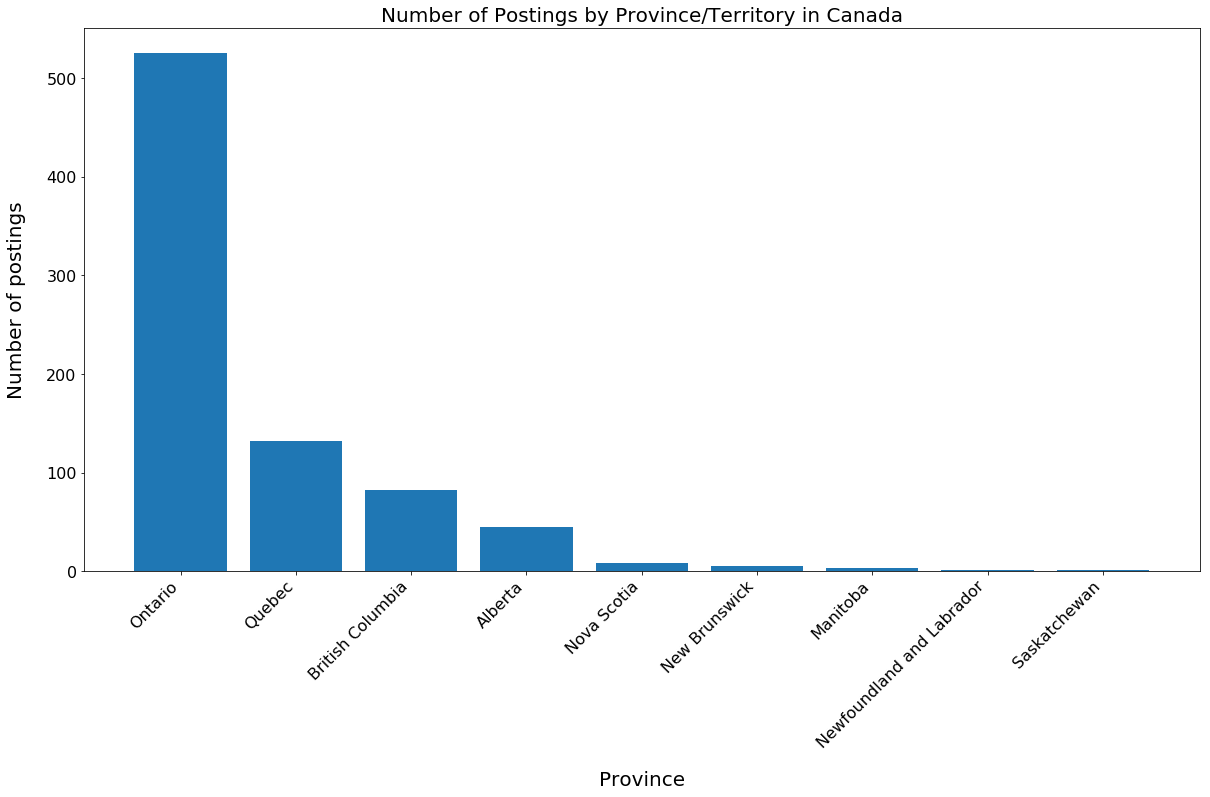

In [23]:
#Number of jobs in province
freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["province_fullname"] ).size()}).reset_index()
freq_df.sort_values(by=['count'], inplace=True, ascending=False)

plt.figure(figsize=(20,10))
plt.bar(freq_df['province_fullname'],  freq_df['count'], )
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Number of Postings by Province/Territory in Canada', fontsize=20)
plt.xlabel('Province', fontsize=20, labelpad=20)
plt.ylabel('Number of postings', fontsize=20, labelpad=20)
plt.show()


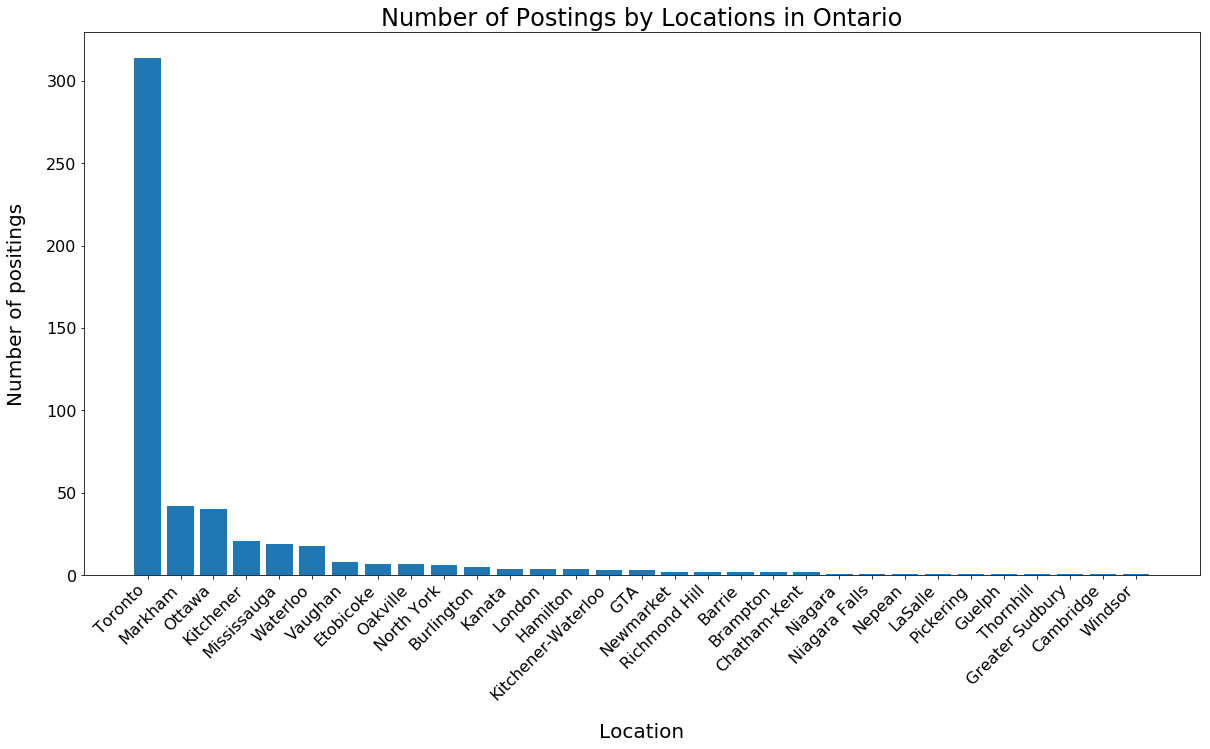

In [24]:
#Number of jobs in Ontario by City

on_df = CA_processed_df[CA_processed_df['province'] == 'ON']
freq_df = pd.DataFrame({'count' : on_df.groupby( ["city"] ).size()}).reset_index()
freq_df.sort_values(by=['count'], inplace=True, ascending=False)

plt.figure(figsize=(20,10))
plt.bar(freq_df['city'], freq_df['count'])
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.title('Number of Postings by Locations in Ontario', fontsize=24)
plt.xlabel('Location', fontsize=20, labelpad=20)
plt.ylabel('Number of positings', fontsize=20, labelpad=20)
plt.show()

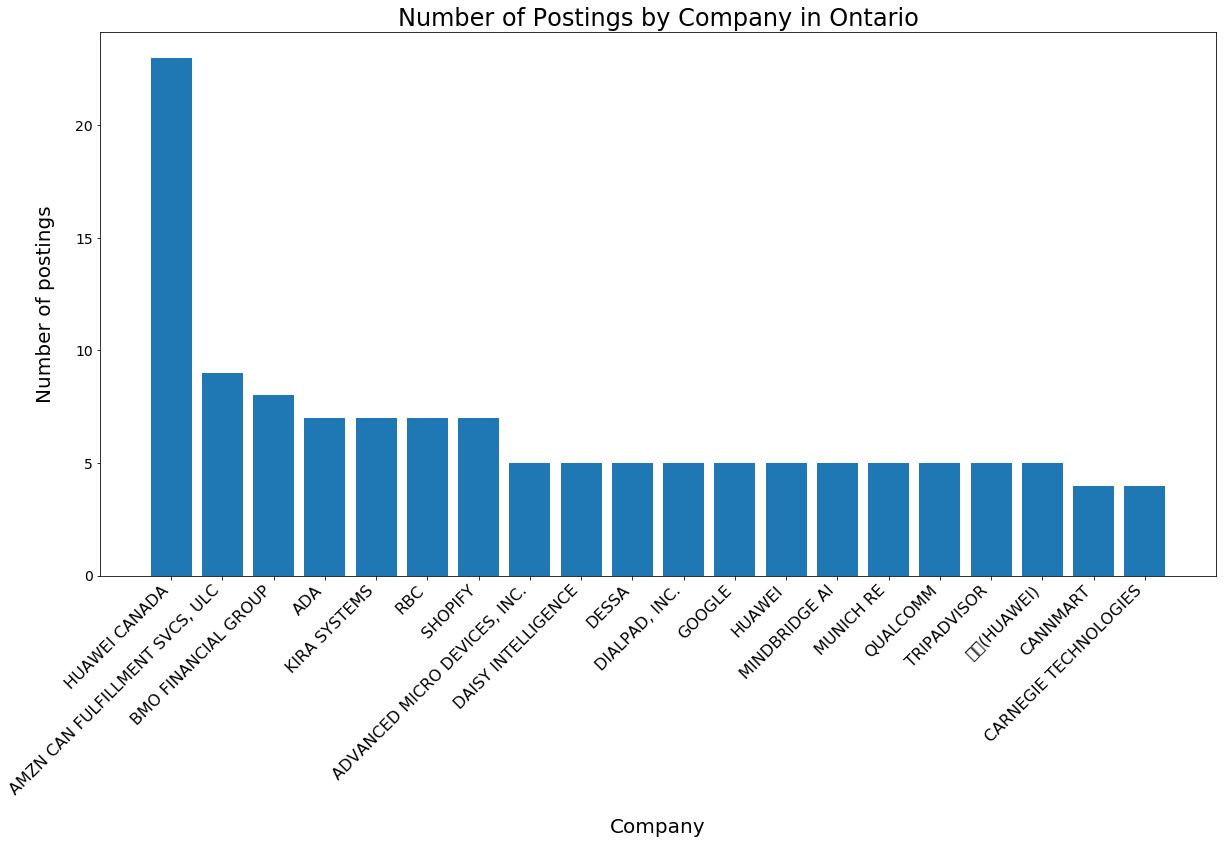

In [25]:
#Number of jobs in Onatrio by Company
freq_df = pd.DataFrame({'count' : on_df.groupby( ["company_processed"] ).size()}).reset_index()

top_10_freq_df = freq_df.nlargest(20, 'count')
plt.figure(figsize=(20,10))
plt.bar(top_10_freq_df['company_processed'], top_10_freq_df['count'])
plt.xticks(rotation = 45, fontsize=16, horizontalalignment='right')
plt.yticks(fontsize=14)
plt.title('Number of Postings by Company in Ontario', fontsize=24)
plt.xlabel('Company', fontsize=20, labelpad=20)
plt.ylabel('Number of postings', fontsize=20, labelpad=20)
plt.show()

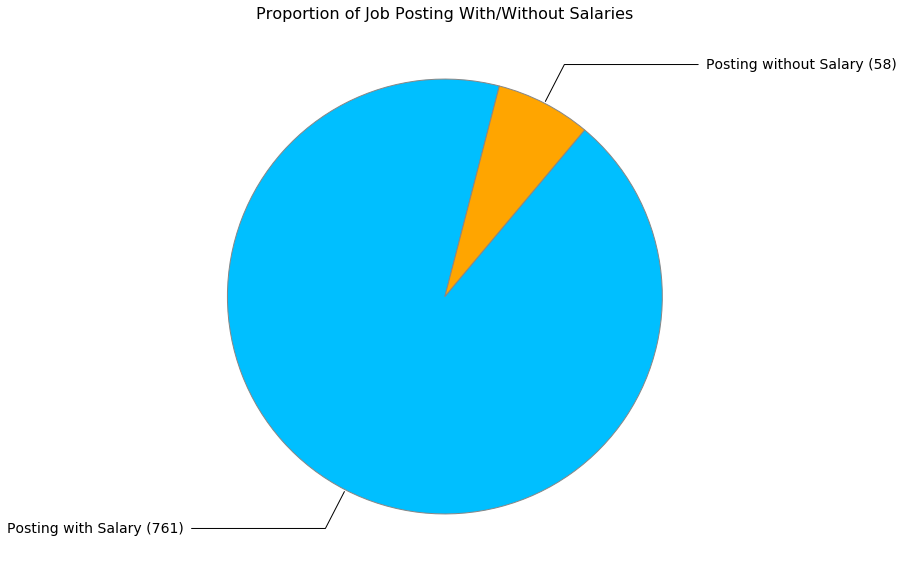

In [26]:

freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["salary_flg"] ).size()}).reset_index()

data = freq_df['count']
data_label = ['Posting with Salary', 'Posting without Salary' ]

len(data)
data_label_pct = []
for i in range(len(data)):
    data_label_pct.append(data_label[i] + ' (' + str(data[i]) + ')')

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data_color = ['#00bfff', '#ffa500','#ffd700', '#ba55d3' ]
wedges, texts = ax.pie(data, colors = data_color, startangle=50, counterclock=False)
plt.title('Proportion of Job Posting With/Without Salaries', fontsize=16)


bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

#draw lines
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(data_label_pct[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw, fontsize=14)
for w in wedges:
    w.set_linewidth(1)
    w.set_edgecolor('#888888')

plt.show()

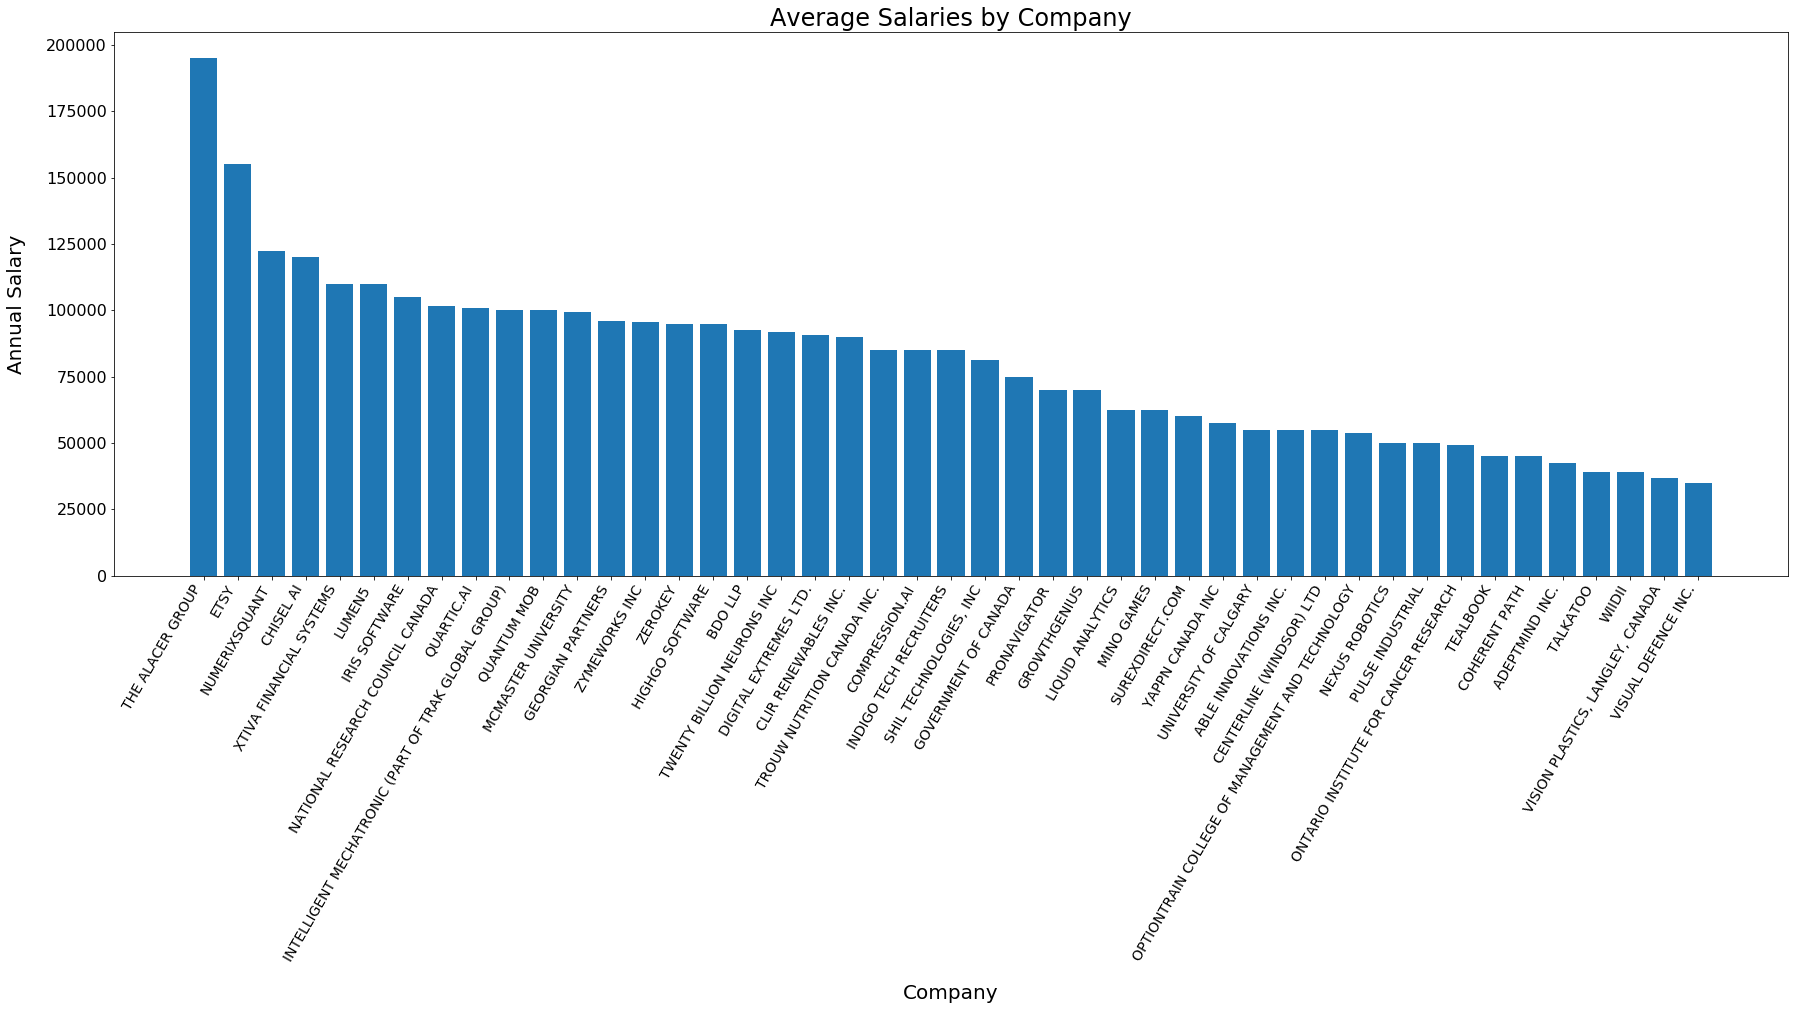

In [27]:
#Top paying companies in Canada
df = CA_processed_df[CA_processed_df['salary'] != '']
#list of companies with salaries
company_list = list(set(df['company_processed']))

data = {}
for company in company_list:
    data[company] = (np.mean(df[df.company_processed == company]['mean_salary']))
    
data = OrderedDict(sorted(data.items(), key=operator.itemgetter(1), reverse=True))
  
    
plt.figure(figsize=(30,10))    
plt.bar(range(len(data)), data.values(), align='center')
plt.title('Average Salaries by Company', fontsize=24)
plt.xticks(range(len(data)), data.keys(), rotation=60, fontsize=14, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.ylabel('Annual Salary', fontsize=20, labelpad=20)
plt.xlabel('Company', fontsize=20, labelpad=20)

plt.show()


    

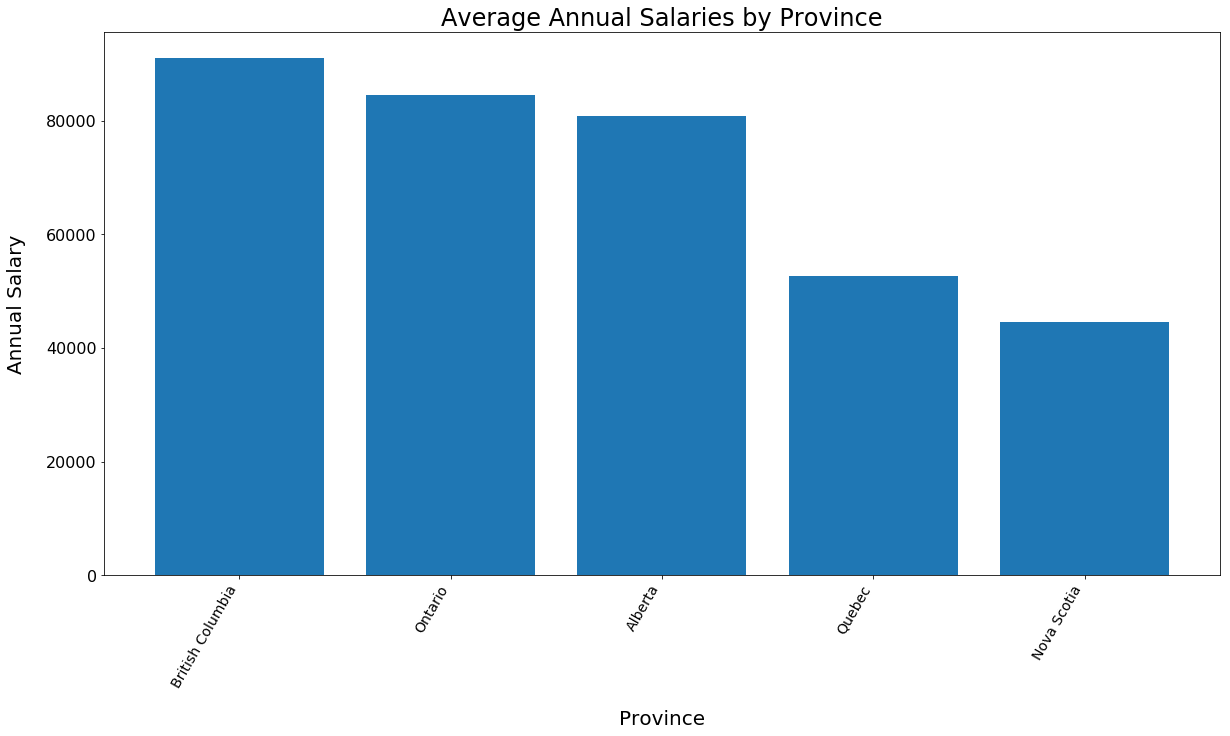

['British Columbia', 'Ontario', 'Alberta', 'Quebec', 'Nova Scotia']


In [28]:
#Top paying provinces in Canada
df = CA_processed_df[CA_processed_df['salary'] != '']
#list of companies with salaries
province_list = list(set(df['province_fullname']))

data = {}
for province in province_list:
    if (type(province) != float):
        data[province] = (np.mean(df[df.province_fullname == province]['mean_salary']))
    
data = OrderedDict(sorted(data.items(), key=operator.itemgetter(1), reverse=True))
  
    
plt.figure(figsize=(20,10))    
plt.bar(range(len(data)), data.values(), align='center')
plt.title('Average Annual Salaries by Province', fontsize=24)
plt.xticks(range(len(data)), data.keys(), rotation=60, fontsize=14, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.ylabel('Annual Salary', fontsize=20, labelpad=20)
plt.xlabel('Province', fontsize=20, labelpad=20)
locs, labels = plt.xticks()
plt.show()

#get companies in the order of the graph
provinces =  [i._text for i in labels]
print(provinces)

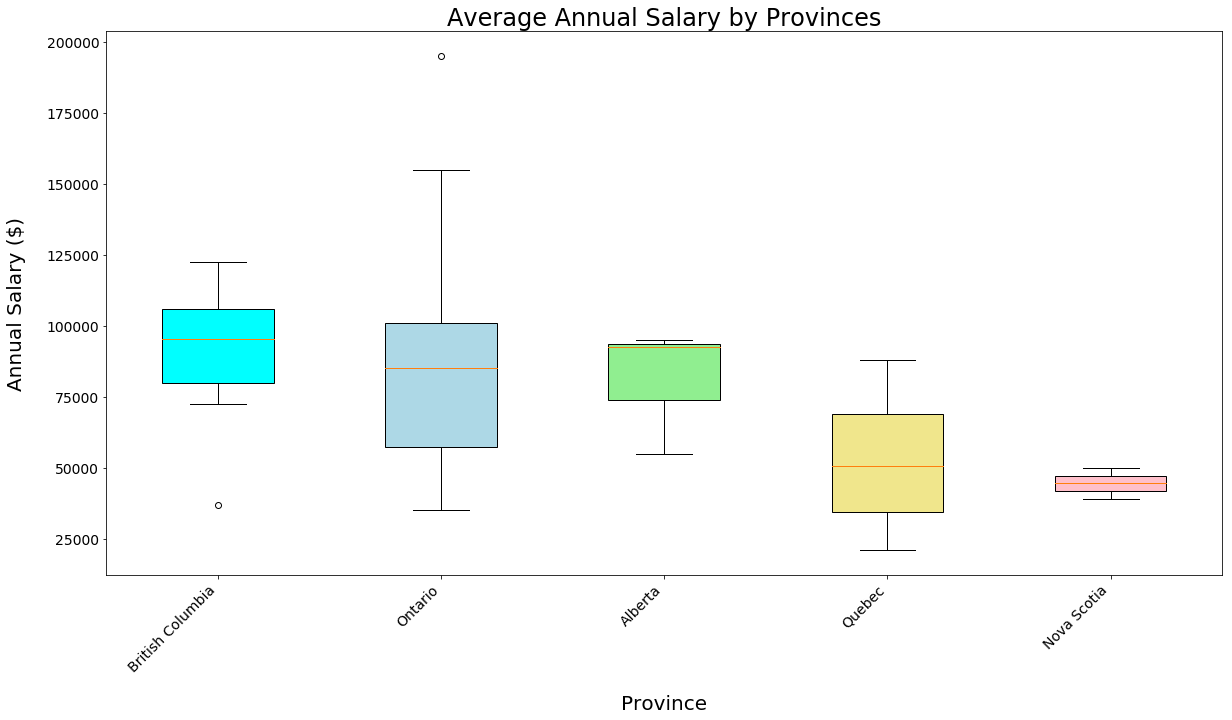

In [29]:
#Top paying provinces in Canada
import math

df = CA_processed_df[(CA_processed_df['salary'] != '')]
#list of companies with salaries
province_list = list(set(df['province_fullname']))

data = {}
for province in provinces:
    if (type(province) != float):
        data[province] = (np.array(df[df.province_fullname == province]['mean_salary']))

        
plt.figure(figsize=(20,10)) 
box = plt.boxplot(data.values(), patch_artist=True,)
plt.xticks(range(1,len(data)+1), data.keys(), rotation=45, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Province', labelpad=20, fontsize=20)
plt.ylabel('Annual Salary ($)', fontsize=20, labelpad=20)
plt.title('Average Annual Salary by Provinces', fontsize=24)

colors = ['cyan', 'lightblue', 'lightgreen', 'khaki', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [30]:
on_df[on_df['company'] == 'The Alacer Group'].head()

range(len(data))

range(0, 5)

# GEO VISUALIZATION

In [31]:

freq_df = pd.DataFrame({'count' : CA_processed_df.groupby( ["province_fullname"] ).size()}).reset_index()
freq_df.columns = ['province', 'count']

freq_merged_df = pd.merge(freq_df, CA_geo_prov_df, on=['province'], how='inner')
freq_merged_df.head()

province  count      lat       lng
0                    Alberta     45  53.9333 -116.5765
1           British Columbia     82  53.7267 -127.6475
2                   Manitoba      3  53.7609  -98.8139
3              New Brunswick      5  46.5653  -66.4619
4  Newfoundland and Labrador      1  53.1355  -57.6604

In [32]:
def popupProvince(row):
    retval = '<b>Province: </b>' + row['province'] + '<br>'
    retval += '<b>Count: </b>' + (str(row['count'])) + '<br>'
    return retval 

def popupProvinceSalary(row):
    retval = '<b>Province: </b>' + row['province'] + '<br>'
    retval += '<b>Salary: </b>' + '${:0,.2f}'.format((row['salary'])) + '<br>'
    return retval 

In [33]:
# Reference https://python-visualization.github.io/folium/quickstart.html



map = folium.Map(location = [55.2, -92.3], zoom_start=4)

# canada.geojson obtained form 
# https://github.com/codeforamerica/click_that_hood/blob/master/public/data/canada.geojson

CA_geoJson = 'canada.geojson'  

# folium.GeoJson(
#     CA_geoJson,
#     name='geojson'
# ).add_to(map)

choropleth = folium.Choropleth(
    geo_data = CA_geoJson,
    name='choropleth',
    data = freq_merged_df,
    columns = ['province', 'count'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Postings"
).add_to(map)

mc = MarkerCluster()
for index,row in (freq_merged_df.iterrows()):
    #print(row)
    #mc.add_child(folium.Marker(location=[row['lat'],row['lng']],popup='<h2>'+ row['title']+'</h2>\n'+row['url']))
    mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                               popup=popupProvince(row),  \
                               icon=folium.Icon(color='blue', icon='info-sign')))

map.add_child(mc)
folium.LayerControl().add_to(map)

map.save('index_jobs_canada_province.html')
map


In [34]:
#Top paying provinces in Canada
df = CA_processed_df[CA_processed_df['salary'] != '']
#list of companies with salaries
province_list = list(set(df['province_fullname']))

data = {}
for province in province_list:
    if (type(province) != float):
        data[province] = (np.mean(df[df.province_fullname == province]['mean_salary']))
    
#data = OrderedDict(sorted(data.items(), key=operator.itemgetter(1), reverse=True))

salary_df = pd.DataFrame.from_dict(data, orient='index')
salary_df['province'] = salary_df.index.values
salary_df.columns = ['salary', 'province']

salary_merged_df = pd.merge(salary_df, CA_geo_prov_df, on=['province'], how='inner')
salary_merged_df.head



<bound method NDFrame.head of          salary          province      lat       lng
0  52634.625000            Quebec  52.9399  -73.5491
1  91082.900000  British Columbia  53.7267 -127.6475
2  84488.500000           Ontario  51.2538  -85.3232
3  44500.000000       Nova Scotia  44.6820  -63.7443
4  80833.333333           Alberta  53.9333 -116.5765>

In [35]:
# Reference https://python-visualization.github.io/folium/quickstart.html



map = folium.Map(location = [55.2, -92.3], zoom_start=4)

# canada.geojson obtained form 
# https://github.com/codeforamerica/click_that_hood/blob/master/public/data/canada.geojson

CA_geoJson = 'canada.geojson'  

# folium.GeoJson(
#     CA_geoJson,
#     name='geojson'
# ).add_to(map)

choropleth = folium.Choropleth(
    geo_data = CA_geoJson,
    name='choropleth',
    data = salary_merged_df,
    columns = ['province', 'salary'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Salary"
).add_to(map)

mc = MarkerCluster()
for index,row in (salary_merged_df.iterrows()):
    #print(row)
    #mc.add_child(folium.Marker(location=[row['lat'],row['lng']],popup='<h2>'+ row['title']+'</h2>\n'+row['url']))
    mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                               popup=popupProvinceSalary(row),  \
                               icon=folium.Icon(color='blue', icon='info-sign')))

map.add_child(mc)
folium.LayerControl().add_to(map)

map.save('index_salary_canada_province.html')
map


In [36]:
#function for popup
def formatPopup(row):
    retval = '<b>Title: </b>' + row['title'] + '<br>'
    retval += '<b>Company: </b>' + row['company'] + '<br>'
    retval += '<b>Summary: </b>' +  row['summary'] + '<br>'
    if len(row['salary']) > 0:
        retval += '<b>Salary:</b>' +  row['salary'] + '<br>'
        
    retval += '<a href=' + row['url'] + ' a target="_blank">' + row['url'] +'</a>'
    
    return retval


In [37]:
set((CA_processed_df[CA_processed_df['province'] == 'NL'])['city'])

{"St. John's"}

In [38]:
set((CA_merged_df[CA_merged_df['province'] == 'NL'])['city'])

set()

### Marker of jobs in Ontario

In [39]:
#reference https://python-visualization.github.io/folium/quickstart.html
    
#Visualization of jobs in Ontario
map = folium.Map(location = [50.2, -82.3], zoom_start=5) #ontario
mc = MarkerCluster()
for index,row in (CA_merged_df[CA_merged_df['province'] == 'ON'].iterrows()):
    #print(row)
    #mc.add_child(folium.Marker(location=[43.666,-73.5],popup='<h2>'+ row['title']+'</h2>\n'+row['url']))
    if (len(row['salary']) > 0):
        mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                                   popup=formatPopup(row),  \
                                   icon=folium.Icon(color='green', icon='info-sign')))
    else:
        mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                                   popup=formatPopup(row),  \
                                   icon=folium.Icon(color='blue', icon='info-sign')))

map.add_child(mc)

map.save('index_jobs_ontario_city.html')
map

In [40]:
#Visualization of jobs in Canada
map = folium.Map(location = [55.2, -92.3], zoom_start=4)
mc = MarkerCluster()
for index,row in (CA_merged_df.iterrows()):
    #print(row)
    if (len(row['salary']) > 0):
        mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                                   popup=formatPopup(row),  \
                                   icon=folium.Icon(color='green', icon='info-sign')))
    else:
        mc.add_child(folium.Marker(location=[row['lat'],row['lng']], \
                                   popup=formatPopup(row),  \
                                   icon=folium.Icon(color='blue', icon='info-sign')))

map.add_child(mc)
map.save('index_jobs_canada_city.html')
map


## Job Posting Preprocessing

In [41]:
from pytagcloud import create_tag_image,  make_tags, LAYOUT_MIX
from IPython.display import Image

import gensim
from bs4 import BeautifulSoup
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.util import ngrams


import nltk
nltk.download('wordnet')

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roger\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words
def clean_text( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'html.parser') 
    #Remove javascript elements
    for script in review_text(["script", "style"]):
        script.extract()    # rip it out

    # get text
    review_text = review_text.get_text()
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    
    
    additional_stop_words = ['webfont','limited','saved','disability',\
                             'desirable', 'de','nreum','skills','net','+','k',\
                            'above','it','end','excellent','join','want','incude',\
                            'how','well','sets','like','page','home','demonstrated',\
                            'other','re','size','etc','gettime','work','ms','environment'\
                            'zqdxyrmad','description','value','re','transactionname',\
                            'education','daylight','highly','bodyrendered','candidates'\
                            'amazon','new','bam','techniques','com','min','world','multiple',\
                            'need','email','job','content','features','g','canada',\
                            'service','wa','id','modern','looking','eastern','services','products',\
                            'qualifications','teams','based','false','times','industry',\
                            'software','career','ability','platform','years','data',\
                            'date','product','team','time','agent','information',\
                            'methods','candidate','customers','back','info','scientist',\
                            'experience','apply','us','engineering','learning','technologies',\
                            'strong','business','design','title','large','e','document',\
                            'science','company','location','field','communication',\
                            'customer','tools','used','research','make','plus',\
                            'opportunity','online','including', 'people','take','successful','success'\
                            'preferred','across','beacon','using','friend','function',\
                            'position','window','role','3','written','build','provide',\
                            'presentation','getelementbyid','technical','posted','need','preferred'\
                            'newrelic','decision','log','errorbeacon','solutions','good','members',\
                            'applicationtime','enable','responsibilities','help','understanding',\
                            'models','applicationid','complex','licensekey','best','des',\
                            'high','browser','d','nr','develop', 'development', 'et', 'please',\
                            'selection','queuetime','cookies','icimsaddonload','various',\
                            'computer','icims','scientists','great','returning','candidates','l','key',\
                            'systems','writing','united','working','iframe','real','relevant',\
                            'analyses','applications','try','related','use','users','opportunities',\
                            'states','languages','yghvbe','language','one','following','able',\
                            'ensure','within','les','impact','part','full','required','sales',\
                            'clients','also','must','needs','employment','benefits','applicants',\
                             'interest','results','la','growing','growth','day','making','status','en',\
                            'site','llc,','category','personalized','knowledge', 'looking', 'including']
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not (w in stops or w in additional_stop_words)]   
    
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 


# my counters {word: count}
def wordcounter(word_list):
    my_dict = {}
    for key in word_list:
        if key in my_dict:
            my_dict[key] += 1
        else:
            my_dict[key] = 1
    return my_dict
            
# get frequency of a word
def findfreq(word, sorted_wordscount):
    freq = 0
    for pair in sorted_wordscount:
        if (pair[0] == word):
            freq = pair[1]
    return freq 

# get words between frequency range
def findwords(freq_min, freq_max, sorted_wordscount):
    words = []
    for pair in sorted_wordscount:
        if (pair[1] >= freq_min) and (pair[1] <= freq_max):
            words.append(pair)
    return words


In [43]:
text = ""
for post in (CA_processed_df['summary']):
    text += " " + post

text = clean_text(text)  

text_list = text.split(" ")

unigrams = ngrams(text_list, 1) # resulting object is an iterator
unigrams = list(ngrams(text_list, 1)) # resulting object is an iterator

freq = Counter(unigrams)
  
topN = freq.most_common()[1:100] #top frequent 100 words
wordscount = {w[0]:f for w, f in topN}
sorted_wordscount = sorted(wordscount.items(), key=operator.itemgetter(1),reverse=True)


## Word cloud by Job Summary in Canada

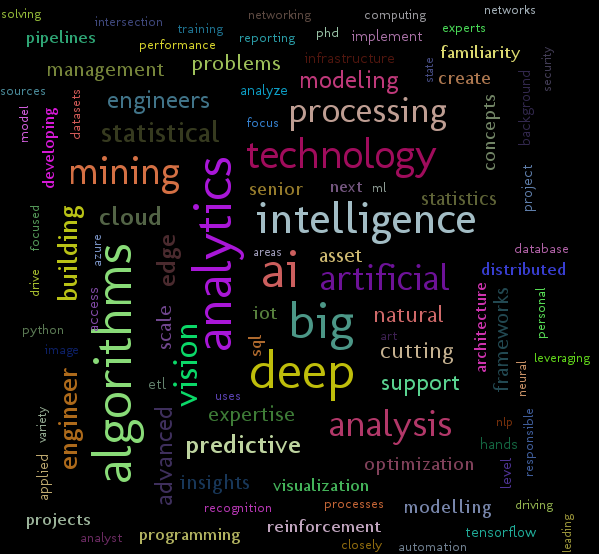

In [44]:
## use pytag package
create_tag_image(make_tags(sorted_wordscount[:],maxsize=50), 'filename2.png', size=(600,600), background=(0, 0, 0, 255), layout=LAYOUT_MIX, fontname='Molengo', rectangular=True)
Image("filename2.png")

In [45]:
sorted_wordscount

[('algorithms', 84),
 ('analytics', 83),
 ('ai', 82),
 ('deep', 81),
 ('big', 75),
 ('intelligence', 65),
 ('technology', 60),
 ('mining', 55),
 ('analysis', 52),
 ('artificial', 51),
 ('processing', 48),
 ('vision', 45),
 ('statistical', 37),
 ('building', 34),
 ('engineer', 33),
 ('cloud', 30),
 ('edge', 30),
 ('predictive', 30),
 ('advanced', 29),
 ('engineers', 29),
 ('modeling', 29),
 ('support', 27),
 ('cutting', 26),
 ('natural', 26),
 ('problems', 25),
 ('expertise', 24),
 ('asset', 23),
 ('statistics', 23),
 ('insights', 22),
 ('scale', 22),
 ('frameworks', 22),
 ('management', 22),
 ('optimization', 20),
 ('senior', 20),
 ('iot', 19),
 ('create', 19),
 ('concepts', 19),
 ('modelling', 19),
 ('familiarity', 18),
 ('sql', 18),
 ('visualization', 18),
 ('reinforcement', 18),
 ('distributed', 18),
 ('projects', 18),
 ('programming', 18),
 ('pipelines', 18),
 ('architecture', 17),
 ('next', 17),
 ('developing', 17),
 ('tensorflow', 16),
 ('applied', 16),
 ('implement', 16),
 ('etl

In [46]:
text = ""
for post in (CA_processed_df['posting']):
    
    text += " " + post

text = clean_text(text)  

text_list = text.split(" ")

# text_list = [w for w in text_l if w != 'machine']
# text_list = [w for w in text_list if w != 'learning']

# print(text_list)  #
unigrams = ngrams(text_list, 1) # resulting object is an iterator
# bigrams = ngrams(text_list, 2) # 
unigrams = list(ngrams(text_list, 1)) # resulting object is an iterator

freq = Counter(unigrams)
  
topN = freq.most_common()[1:100] #top frequent 100 words
wordscount = {w[0]:f for w, f in topN}
sorted_wordscount = sorted(wordscount.items(), key=operator.itemgetter(1),reverse=True)

## Wordcloud by job posting in Canada

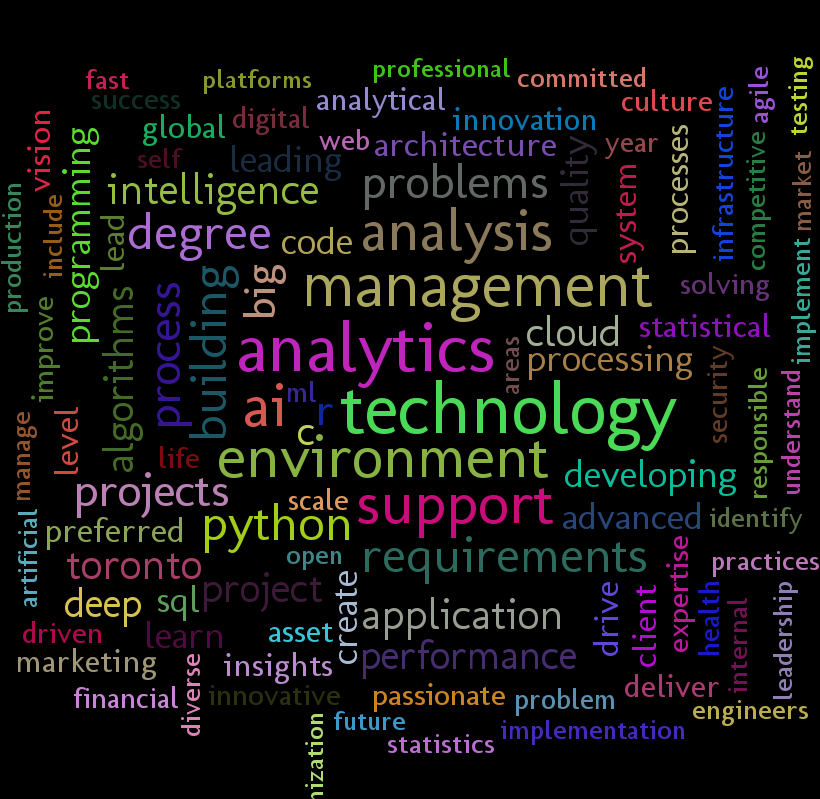

In [47]:
## use pytag package
create_tag_image(make_tags(sorted_wordscount[:],maxsize=60), 'filename3.png', size=(1000,800), background=(0, 0, 0, 255), layout=LAYOUT_MIX, fontname='Molengo', rectangular=True)
Image("filename3.png")

In [48]:
topN1000 = freq.most_common()[1:1000] #top frequent 100 words
wordscount = {w[0]:f for w, f in topN1000}
sorted_wordscount = sorted(wordscount.items(), key=operator.itemgetter(1),reverse=True)

findwords(300, 800, sorted_wordscount)

[('ai', 735),
 ('environment', 731),
 ('support', 721),
 ('analysis', 685),
 ('building', 588),
 ('python', 587),
 ('requirements', 570),
 ('degree', 567),
 ('problems', 545),
 ('process', 537),
 ('projects', 534),
 ('big', 492),
 ('r', 478),
 ('intelligence', 476),
 ('application', 474),
 ('toronto', 469),
 ('algorithms', 459),
 ('project', 454),
 ('cloud', 452),
 ('deep', 447),
 ('c', 446),
 ('performance', 443),
 ('programming', 403),
 ('developing', 402),
 ('quality', 399),
 ('learn', 391),
 ('code', 389),
 ('leading', 383),
 ('create', 383),
 ('processing', 382),
 ('sql', 379),
 ('advanced', 373),
 ('architecture', 351),
 ('preferred', 350),
 ('drive', 342),
 ('system', 341),
 ('client', 330),
 ('lead', 330),
 ('level', 329),
 ('processes', 328),
 ('marketing', 325),
 ('global', 322),
 ('asset', 320),
 ('vision', 319),
 ('insights', 315),
 ('statistical', 315),
 ('analytical', 313),
 ('deliver', 311),
 ('innovation', 310)]